## Agregando as malhas de outros tipos de transportes

### Dados:

-- Estações BRT: https://opendata.arcgis.com/datasets/f753941f44a749d4987f1111aa6486b3_22.geojson

-- Estações de Trem: https://opendata.arcgis.com/datasets/8c9f264be1e946b1b49cf4c198bd5e46_16.geojson

In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd

In [2]:
def cria_dir(pasta:str, path='dados/processados/mapas'):
    '''
    Função para criar diretorios em um caminho especificado
    '''
    import os

    dir_ = f'{path}/{pasta}' 
    if not os.path.exists(dir_):
        os.makedirs(dir_)
    
    return dir_

In [3]:
metro = gpd.read_file('dados/originais/transporte/metro/Estacoes_Metro.geojson')

In [4]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)


In [5]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [6]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)


In [6]:
g_rj = gpd.read_file('dados/originais/RJ/RJ_Municipios_2019.shp')
g_rj = g_rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')
g_rj = g_rj.loc[g_rj['NM_MUN'] == 'Rio de Janeiro']
geo_dados = gpd.read_file('dados/processados/mapas/RJ-DATASET/RJ-DATASET.shp')

In [7]:
trem = gpd.read_file('dados/originais/transporte/Trem/Estações_Trem.geojson')
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
brt = gpd.read_file('dados/originais/transporte/BRT/Estações_BRT.geojson')
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

### Estações de Trem

<AxesSubplot:>

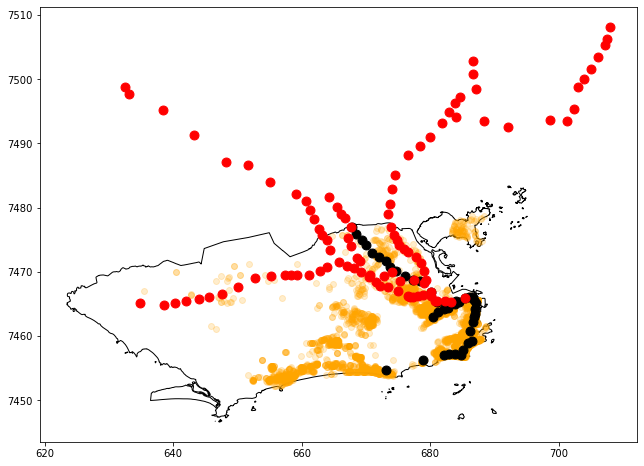

In [11]:
base = g_rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize=80)
trem.plot(ax=base, color='red', markersize=80)

In [8]:
trem = trem[trem.within(g_rj.iloc[0]['geometry'])]

<AxesSubplot:>

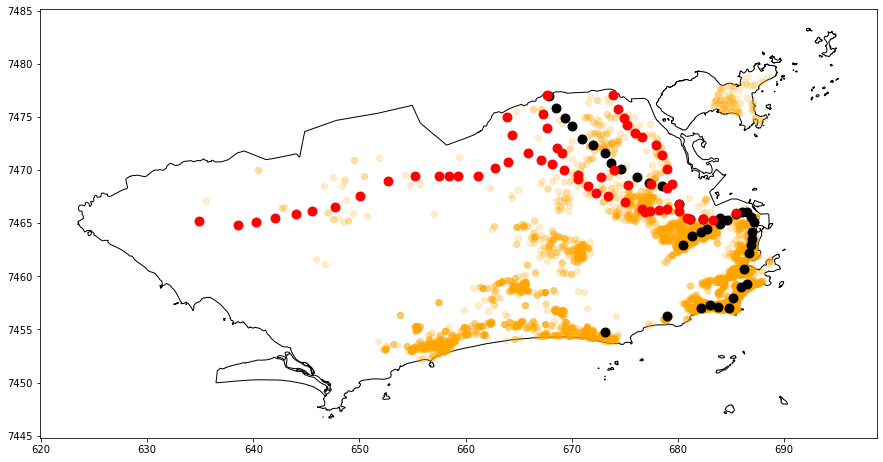

In [9]:
base = g_rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize=80)
trem.plot(ax=base, color='red', markersize=80)

In [15]:
g_rj

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((632.953 7457.528, 632.956 7457..."


### Estações BRT

<AxesSubplot:>

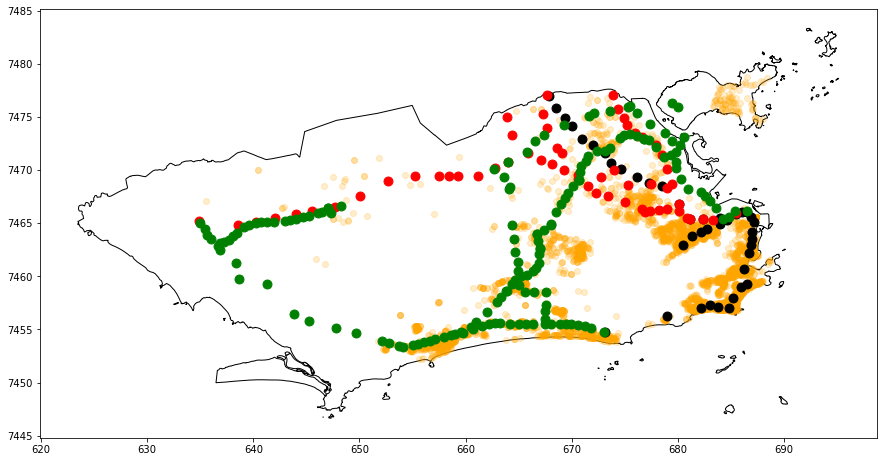

In [16]:
base = g_rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize=80)
trem.plot(ax=base, color='red', markersize=80)
brt.plot(ax=base, color='green', markersize=80)

In [20]:
transporte = pd.concat([trem['geometry'], metro['geometry'], brt['geometry']], ignore_index=True)

In [21]:
type(transporte)

geopandas.geoseries.GeoSeries

In [22]:
transporte

0      POINT (676.866 7466.079)
1      POINT (663.964 7470.815)
2      POINT (662.792 7470.218)
3      POINT (661.119 7469.485)
4      POINT (659.274 7469.469)
                 ...           
257    POINT (664.056 7468.207)
258    POINT (663.576 7469.330)
259    POINT (662.677 7470.133)
260    POINT (663.983 7470.796)
261    POINT (664.181 7468.397)
Length: 262, dtype: geometry

In [23]:
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

In [24]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,geometry,Dist_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,POINT (657.514 7453.832),0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,POINT (670.524 7461.803),3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,POINT (674.345 7469.440),0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,POINT (662.701 7457.284),0.422370
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,POINT (656.019 7453.574),0.214605


In [25]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro,Dist_Transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040
Dist_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000


In [26]:
diretorio = cria_dir('RJ-DATASET')
geo_dados.to_file(diretorio)